<a href="https://colab.research.google.com/github/belleorlandi/pds_ufabc2019/blob/master/pds_exC1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---


# Processamento Digital de Sinais 
## *Exercício Computacional 1*


---




**Nome:** Isabelle Orlandi

**RA:** 11056613




---


## Objetivos

Este Exercício Computacional tem como objetivo introduzir o uso da ferramenta Jupyter Notebook para elaboração de códigos e relatórios relacionados ao processamento digital de sinais. Tem ainda como objetivo específico, fixar e consolidar conhecimentos sobre sinais digitais e funções de convolução no domínio discreto obtidos na disciplina de Procesamento Digital de Sinais.        





---


## Exercícios

### Exercício 1 

Implemente um algoritmo comentado que seja capaz de calcular a convolução discreta de dois sinais quaisquer $x(n)$ e $h(n)$, de duração finita, utilizando uma das três diferentes formas de se calcular a convolução, descritas nos itens abaixo. Considere o sinal $x(n)$ como sendo um vetor contendo $N_x$ linhas e uma coluna, o sinal $h(n)$ como sendo um vetor contendo $N_h$ linhas e uma coluna e o sinal $y(n)$, contendo o resultado da convoluçao, como sendo um vetor de $N_y = N_x +N_h -1$ linhas e uma coluna. 


**(a)** Um dos métodos consiste em calcular a convolução através da expressão $y(n) = \sum_{k=-\infty}^{\infty} x(k)h(n-k)$, onde cada amostra dos sinal $y(n)$ é calculada individualmente.




**(b)** O outro método consiste em calcular o vetor $y(n)$ como uma combinação linear de $N_x$ vetores $h(n-k)$ contendo o sinal $h(n)$ atrasado de $k$ amostras, ponderados por $x(k)$. Observe que o vetor $h(n-k)$, para todos os valores de $k$, é um vetor com $N_y = N_x +N_h -1$ linhas e uma coluna. 


**(c)** O último método é baseado na multiplicação do vetor $x(n)$ pela matriz de convolução $H$, de dimensão $N_y = N_x +N_h -1$ linhas e $N_x$ colunas. Cada coluna da matriz $H$ é dado pelo vetor $h(n-k)$ contendo o sinal $h(n)$ atrasado de $k$ amostras. 








> Para a resolução do exercício 1, onde é proposta a implementação de uma função que realize a convolução discreta de dois sinais, optou-se pelo método descrito no item (a), onde o sinal resultado da convolução é calculado individualmente para cada fator $n$ a partir da expressão $y(n) = \sum_{k=-\infty}^{\infty} x(k)h(n-k)$. A escolha deste método ocorreu apenas pela sua simplicidade de implementação e código sucinto. 
> As proxímas seções apresentam a implementação da função $conv()$ e o código está comentado para melhor entendimento da metodologia utilizada. 





In [0]:
# Importação das bibliotecas necessárias

import numpy as np                         #Biblioteca para operações matemáticas
import matplotlib.pyplot as plt            #Biblioteca para plotar gráficos

In [0]:
# Definicação da função convolução discreta.

def conv(a,b):
    
    # Identifica o tamanho do vetor A.
    Na = np.size(a)  
    
    # Identifica o tamanho do vetor B.
    Nb = np.size(b)  
    
    # Calcula o tamanho necessário de acordo com a fórmula Ny = Na+Nb-1 
    # e inicia o vetor resultado com zeros.
    y = np.zeros(Na + Nb - 1) 
    
    # Estrutura em loop que percorre todos os elementos do vetor resultado.
    # Cada elemento do vetor resultado é calculado pela fórmula da convolução. 
    for m in np.arange(Na):
        for n in np.arange(Nb):
            
            # Fórmula de somatória da convolução discreta
            y[m+n] = y[m+n] + (a[m] * b[n])
           
    # Retorna o vetor resultado como saída da função conv(a,b)    
    return y

### Exercício 2

Realize os cálculos e plote os resultados da convolução obtida para os seguintes sinais:

#### **(a)** Impulso Unitário
$h(n)$ é um vetor contendo, em cada elemento, um algarismo do seu RA e $x(n)$ é um vetor contendo 100 amostras de um impulso unitário ($n=0$ até $n=99$);

<StemContainer object of 3 artists>

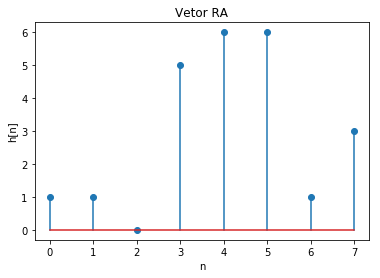

In [155]:
# Inicializa um vetor contendo os algarismos do RA 11056613:
h = np.array([1,1,0,5,6,6,1,3])


#Plota o vetor h construido
plt.xlabel('n')
plt.ylabel('h[n]')
plt.title('Vetor RA')
plt.stem(h)

<StemContainer object of 3 artists>

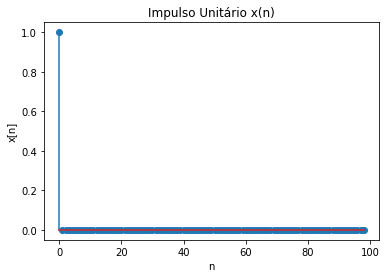

In [156]:
# Definição da função impulso unitário:
def impulsoU(x): 
    
    #Inicializa o vetor degrau unitário com a quantidade de amostras igual ao tamanho de x
    d = np.zeros(len(x)) 
    
    # Loop que atribui valor u(n) = 1 para n = 0
    for i in range(0,len(x)): 
        if x[i] == 0: 
            d[i] = 1. 
    return d

# Determina o intervalo n utilizado (0 < n < 99)
n = np.arange(0, 99)

# Cria o vetor degrau unitário para 0 < n < 99.
x = impulsoU(n)

#Plota o vetor x degrau unitário construido
plt.xlabel('n')
plt.ylabel('x[n]')
plt.title('Impulso Unitário x(n)')
plt.stem(x)

<StemContainer object of 3 artists>

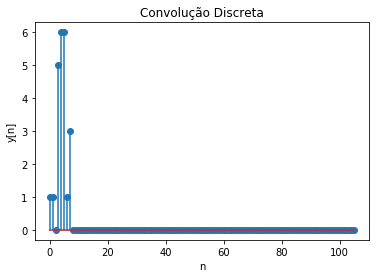

In [157]:
# Calcula a convolução do sinal de impulso unitário x(n) com o sinal h(n)
# utilizando a função conv() implementada no exercício 1.
y = conv(x,h)

#Plota o resultado obtido
plt.xlabel('n')
plt.ylabel('y[n]')
plt.title('Convolução Discreta')
plt.stem(y)

Para verificar que a função convolução discreta foi corretamente  implementada, foi utilizada a função $np.convolve()$ da biblioteca Numpy: 

<StemContainer object of 3 artists>

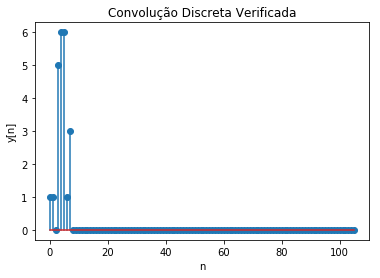

In [158]:
# Convolução utilizando a biblioteca Numpy:
y_verificado = np.convolve(x,h)

#Plota o resultado obtido
plt.xlabel('n')
plt.ylabel('y[n]')
plt.title('Convolução Discreta Verificada')
plt.stem(y_verificado)


#### **(b)** Degrau Unitário
$h(n)$ é um vetor contendo, em cada elemento, um algarismo do seu RA e $x(n)$ é um vetor contendo 100 amostras de um degrau unitário ($n=0$ até $n=99$);

<StemContainer object of 3 artists>

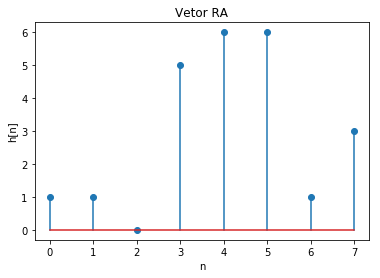

In [159]:
# Inicializa um vetor contendo os algarismos do RA 11056613:
h = np.array([1,1,0,5,6,6,1,3])


#Plota o vetor h construido
plt.xlabel('n')
plt.ylabel('h[n]')
plt.title('Vetor RA')
plt.stem(h)

<StemContainer object of 3 artists>

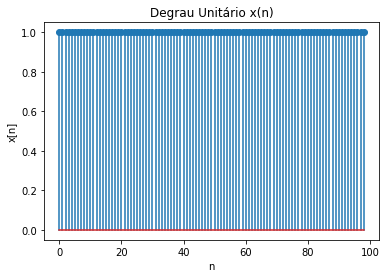

In [160]:
# Definição da função degrau unitário:
def degrauU(x): 
    
    #Inicializa o vetor degrau unitário com a quantidade de amostras igual ao tamanho de x
    u = np.zeros(len(x)) 
    
    # Loop que atribui valor u(n) = 1 para n > 0
    for i in range(0,len(x)): 
        if x[i] >= 0: 
            u[i] = 1. 
    return u

# Determina o intervalo n utilizado (0 < n < 99)
n = np.arange(0, 99)

# Cria o vetor degrau unitário para 0 < n < 99.
x = degrauU(n)

#Plota o vetor x degrau unitário construido
plt.xlabel('n')
plt.ylabel('x[n]')
plt.title('Degrau Unitário x(n)')
plt.stem(x)

<StemContainer object of 3 artists>

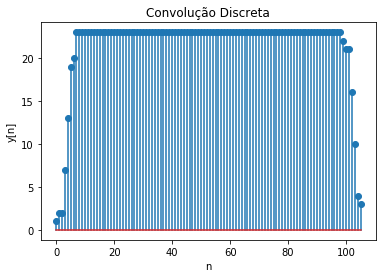

In [161]:
# Calcula a convolução do sinal de degrau unitário x(n) com o sinal h(n)
# utilizando a função conv() implementada no exercício 1.
y = conv(x,h)

#Plota o resultado obtido
plt.xlabel('n')
plt.ylabel('y[n]')
plt.title('Convolução Discreta')
plt.stem(y)

Novamente, para verificar que a função convolução discreta foi corretamente  implementada, foi utilizada a função $np.convolve()$ da biblioteca Numpy: 

<StemContainer object of 3 artists>

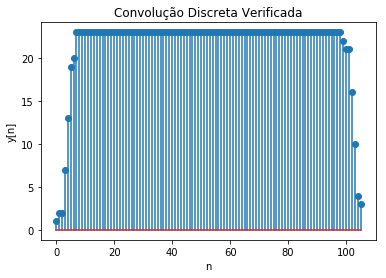

In [162]:
# Convolução utilizando a biblioteca Numpy:
y_verificado = np.convolve(x,h)

#Plota o resultado obtido
plt.xlabel('n')
plt.ylabel('y[n]')
plt.title('Convolução Discreta Verificada')
plt.stem(y_verificado)


#### **(c)** Sinal Senoidal
$h(n)$ é um vetor contendo, em cada elemento, um algarismo do seu RA e $x(n)$ é um vetor contendo 100 amostras de um sinal senoidal dado por $x(n) = cos(0,1\pi n)+cos(0,9\pi n)$, para $n=0$ até $n=99$;



<StemContainer object of 3 artists>

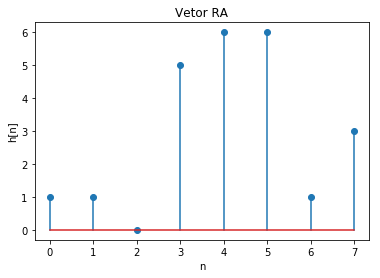

In [163]:
# Inicializa um vetor contendo os algarismos do RA 11056613:
h = np.array([1,1,0,5,6,6,1,3])


#Plota o vetor h construido
plt.xlabel('n')
plt.ylabel('h[n]')
plt.title('Vetor RA')
plt.stem(h)

<StemContainer object of 3 artists>

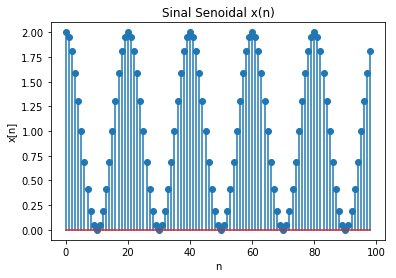

In [164]:
# Definição do sinal senoidal:
def sin(x): 
    
    #Inicializa o sinal senoidal com a quantidade de amostras igual ao tamanho de x
    sin = np.zeros(len(x)) 
    
    # Loop que atribui valor senoidal ao vetor
    for i in range(0,len(x)):
        sin[i] = np.cos(0.1*np.pi*i) + np.cos(0.0*np.pi*i)
        
    return sin

# Determina o intervalo n utilizado (0 < n < 99)
n = np.arange(0, 99)

# Cria o vetor sinal senoidal para 0 < n < 99.
x = sin(n)

#Plota o vetor x sinal senoidal construido
plt.xlabel('n')
plt.ylabel('x[n]')
plt.title('Sinal Senoidal x(n)')
plt.stem(x)

<StemContainer object of 3 artists>

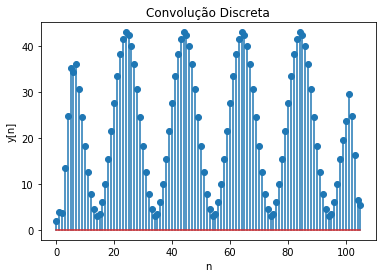

In [165]:
# Calcula a convolução do sinal senoidal x(n) com o sinal h(n)
# utilizando a função conv() implementada no exercício 1.
y = conv(x,h)

#Plota o resultado obtido
plt.xlabel('n')
plt.ylabel('y[n]')
plt.title('Convolução Discreta')
plt.stem(y)

Novamente, para verificar que a função convolução discreta foi corretamente  implementada, foi utilizada a função $np.convolve()$ da biblioteca Numpy: 

<StemContainer object of 3 artists>

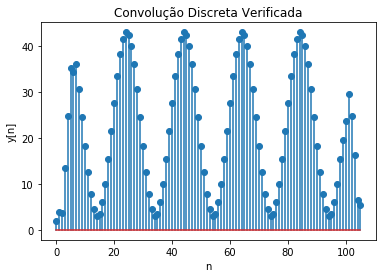

In [166]:
# Convolução utilizando a biblioteca Numpy:
y_verificado = np.convolve(x,h)

#Plota o resultado obtido
plt.xlabel('n')
plt.ylabel('y[n]')
plt.title('Convolução Discreta Verificada')
plt.stem(y_verificado)



---


## Conclusão

Finalizados os exercícios, cabem algumas observações com relação às soluções propostas e a metodologia utilizada. Como primeiro ponto a ser destacado, a implementação da função convolução descrita no Exercício 1 foi realizada considerando entradas de vetores de 1 linha e N colunas, o contrário do proposto pela descrição do exercício que sugere entradas de N linhas e 1 coluna. O motivo da inversão se deu para que os mesmos vetores utilizados na entrada da função implementada $conv()$ pudessem ser entrada da função de verificação $np.convolve()$, sem haver necessidade de transpor o vetor. Em um primeiro momento, o desenvolvimento foi iniciado utilizando os vetores na forma de N linhas e 1 coluna, porém a função $np.convolve()$ apresentava erros de sintaxe quando vetores neste formato eram utilizados como suas entradas. Logo, para padronizar a obtenção dos resultados, optou-se por utilizar vetores de 1 linha e N colunas. Vale resaltar que essa alteração, para os fins propostos, não causou diferença alguma no resultado da convolução.

Partindo para a análise do Exercício 2, onde a implementação da função de convolução discreta é posta para atuar com valores reais, os resultados obtidos para os três sinais utilizados foi condizente com a verificação realizada que utilizou uma função da biblioteca Numpy. O desenvolvimento dos itens (a), (b) e (c) do exercício 2 permitem verificar as diferanças obtidas no resultado quanto ao sinal de entrada utilizado, sendo ele um impulso unitário, um degrau unitário ou um sinal senoidal, quando submetidos à convolução com um sinal comum.

Para finalizar análise da execução deste Exercício Computacional, cabe a observação da importância no incentivo e apoio à utilização de ferramentas computacionais no ensino de Engenharia. Ter contato e implementar soluções computacionais relacionadas aos conteúdos ministrados em aula promove fixação e uma proximidade maior com a realidade da pesquisa e indústria, e quando este passo é dado baseado em ferramentas colaborativas e integradas (como JupyterNotebook, GoogleDrive e GitHub) a proposta de um trabalho estrapola positivamente os limites do conteúdo ministrado (no caso a convolução discreta) e passa a desenvolver no estudante diversas outras habilidades.  



---


## Bibliografia

[Numpy Reference](https://docs.scipy.org/doc/numpy/reference/)

[Pythonize - Tutorial Básico de Numpy](http://pythonize.org/tutorial-basico-numpy.html)